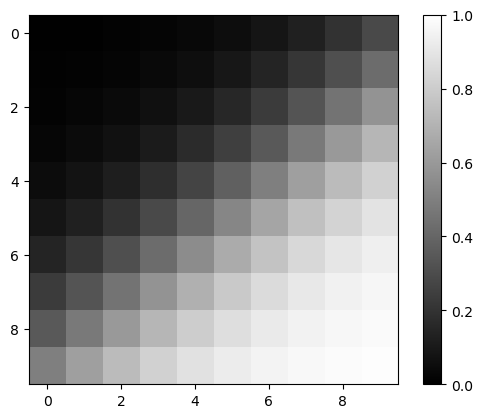

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# x1, x2값
X1 = np.arange(-1.0, 1.0, 0.2); # -1부터 0.2씩 0.8까지... 원소 수는 총 10개
X2 = np.arange(-1.0, 1.0, 0.2);

# 출력 값을 저장할 10x10 그리드
Z = np.zeros((10, 10));

# x1, x2 값의 입력 가중치 ( 원래 딥러닝에서는 랜덤으로 잡힘 )
w_x1 = 2.5;
w_x2 = 3.0;

# 편향
bias = 0.1;

# 그리드맵의 각 그리드별 뉴런의 연산
for i in range(10):
    for j in range(10):
        # 입력과 가중치 곱의 합 + 편향
        u = X1[i]*w_x1 + X2[j]*w_x2 + bias;
        
        # 그리드맵에 출력 값 저장
        y = 1/(1+np.exp(-u)); # Sigmoid 함수
        Z[j][i] = y;
        
# 그리드맵에 표시
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0);
plt.colorbar();
plt.show();

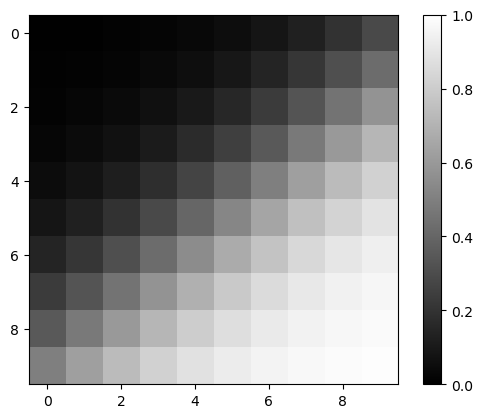

In [2]:
# numpy의 ndarray를 이용한 행렬연산
import numpy as np
import matplotlib.pyplot as plt

# x1, x2값
X1 = np.arange(-1.0, 1.0, 0.2); # -1부터 0.2씩 0.8까지... 원소 수는 총 10개
X2 = np.arange(-1.0, 1.0, 0.2);

# 출력 값을 저장할 10x10 그리드
Z = np.zeros((10, 10));

# x, y값의 입력 가중치
W = np.array([2.5, 3.0]);

# 편향
bias = np.array([0.1]);

# 그리드맵의 각 그리드별 뉴런의 연산
for i in range(10):
    for j in range(10):
        
        # 입력과 가중치 곱의 합 + 편향
        list01 = [X1[i], X2[j]];
        X = np.array(list01);
        u = np.dot(X, W.T) + bias # W행렬 1x2의 .T는 2x1 즉, 행과 열이 뒤집힌다
        
        # 그리드맵에 출력 값 저장
        y = 1/(1+np.exp(-u)); # Sigmoid 함수
        Z[j][i] = y;

# 그리드맵에 표시
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0);
plt.colorbar();
plt.show();

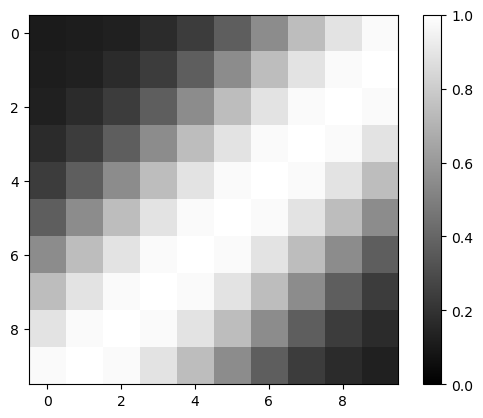

In [2]:
# 다중신경망
# 지금부터 구현하는 신경망 Input Layer 입력2개 Hidden Layer 노드 2개, Output Layer 노드 1개
# Hidden Layer 활성화함수는 Sigmoid, Output Layer 활성화함수는 항등함수( y=x )
# 회귀 => 결과 값이 무조건 1개만 나와야함

import numpy as np
import matplotlib.pyplot as plt

# x, y 값
X = np.arange(-1.0, 1.0, 0.2); # -1부터 0.2씩 0.8까지... 원소 수는 총 10개
Y = np.arange(-1.0, 1.0, 0.2);

# 출력을 저장하는 10X10 그리드
Z = np.zeros((10,10));

# 가중치
w_im = np.array([[4.0, 4.0], [4.0, 4.0]]); # 은닉층 2x2 행렬 ( input 입력2개 hidden 노드2개 )
w_mo = np.array([[1.0], [-1.0]]); # 출력층 2x1 행렬 ( hidden 입력2개 output 노드1개 )

# 편향
b_im = np.array([3.0, -3.0]); # 은닉층
b_mo = np.array([0.1]); # 출력층

# 은닉층
def middle_layer(x, w, b):
    u = np.dot(x, w) + b;
    return 1/(1+np.exp(-u)); # 시그모이드 함수

# 출력층
def output_layer(x, w, b):
    u = np.dot(x, w) + b;
    return u; # 항등함수

# 그리드맵의 각 그리드별 신경망 연산
for i in range(10):
    for j in range(10):
        # 순전파
        inp = np.array([X[i], Y[j]]); # 입력층
        mid = middle_layer(inp, w_im, b_im); # 은닉층
        out = output_layer(mid, w_mo, b_mo); # 출력층
        
        # 그리드맵에 신경망 출력 값 저장
        Z[j][i] = out[0];

# 그리드맵으로 표시
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0);
plt.colorbar();
plt.show();

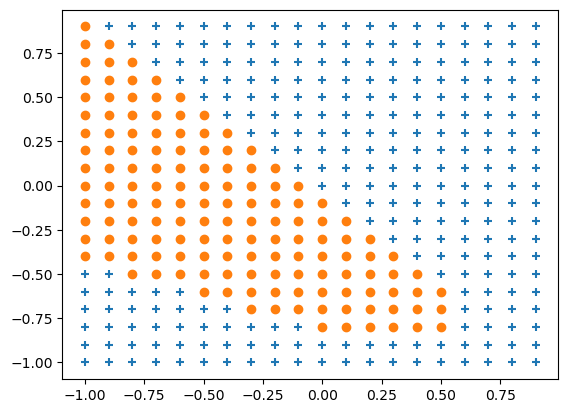

In [6]:
# 다중신경망
# 지금부터 구현하는 신경망 Input Layer 입력2개 Hidden Layer 노드 2개, Output Layer 노드 2개
# Hidden Layer 활성화함수는 Sigmoid, Output Layer 활성화함수는 Softmax 함수 사용
# 분류 => 결과 값이 여러개가 나와야함

import numpy as np
import matplotlib.pyplot as plt

# x, y 값
X = np.arange(-1.0, 1.0, 0.1); # -1부터 0.2씩 0.8까지... 원소 수는 총 20개
Y = np.arange(-1.0, 1.0, 0.1);

# 가중치
w_im = np.array([[1.0, 2.0], [2.0, 3.0]]); # 은닉층 2x2 행렬 ( input 입력2개 hidden 노드2개 )
w_mo = np.array([[-1.0, 1.0], [1.0 ,-1.0]]); # 출력층 2x2 행렬 ( hidden 입력2개 output 노드2개 )

# 편향
b_im = np.array([0.3, -0.3]); # 은닉층
b_mo = np.array([0.4, 0.1]); # 출력층

# 은닉층
def middle_layer(x, w, b):
    u = np.dot(x, w) + b;
    return 1/(1+np.exp(-u)); # 시그모이드 함수

# 출력층
def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return np.exp(u)/np.sum(np.exp(u)) # 소프트맥스 함수

# 분류결과를 저장하는 리스트
x_1 = [];
y_1 = [];
x_2 = [];
y_2 = [];

# 그리드맵의 각 그리드별 신경망 연산
for i in range(20):
    for j in range(20):
        # 순전파
        inp = np.array([X[i], Y[j]]); # 입력층
        mid = middle_layer(inp, w_im, b_im); # 은닉층
        out = output_layer(mid, w_mo, b_mo); # 출력층
        
        # 확률의 크기를 비교해 분류함
        if out[0] > out[1]:
            x_1.append(X[i]);
            y_1.append(Y[j]);
        else:
            x_2.append(X[i]);
            y_2.append(Y[j]);

# 산포도 표시
plt.scatter(x_1, y_1, marker="+");
plt.scatter(x_2, y_2, marker="o");
plt.show();